In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df=pd.read_csv("/content/drive/MyDrive/DV/Carbon_emission_data.csv")
df.head()

,Country,Transport Mode,Carbon Emission (kg/km)
0,USA,Metro,1.82
1,USA,DieselCar,1.97
2,USA,PetrolCar,0.34
3,USA,ElectricCar,1.00
4,USA,Bicycle,0.01


In [56]:
df1=pd.read_csv("/content/drive/MyDrive/DV/Employee_transport_data.csv")
df1.head()

,Employee Name,Country,Year,Transport Used
0,n360,India,2019,"Bus:18km, Tram:4km"
1,n250,Australia,2018,"Scooter:25km, Train:9km"
2,n499,India,2016,"Motorbike:10km, Walking:27km, Train:17km"
3,n979,India,2018,"Train:20km, Ferry:28km, Walking:26km"
4,n65,Germany,2018,DieselCar:6km


In [57]:
df.isnull().sum()

,0
Country,0
Transport Mode,0
Carbon Emission (kg/km),0


In [58]:
df1.isnull().sum()

,0
Employee Name,0
Country,0
Year,0
Transport Used,0


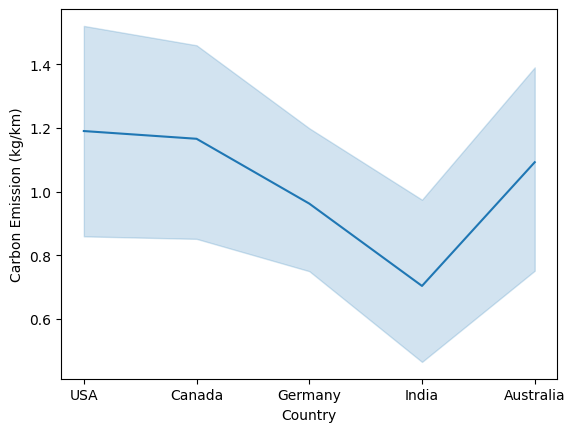

In [59]:
sns.lineplot(x="Country", y="Carbon Emission (kg/km)",data=df)
plt.show()

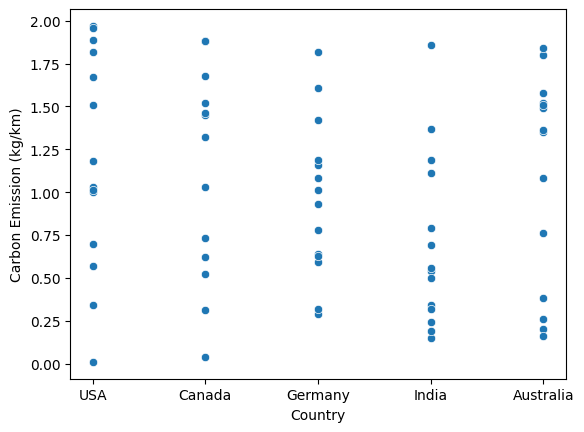

In [60]:
sns.scatterplot(x="Country", y="Carbon Emission (kg/km)",data=df)
plt.show()

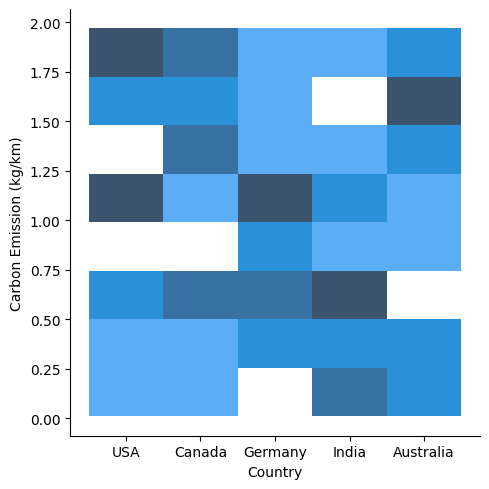

In [61]:
sns.displot(x="Country", y="Carbon Emission (kg/km)",data=df)
plt.show()

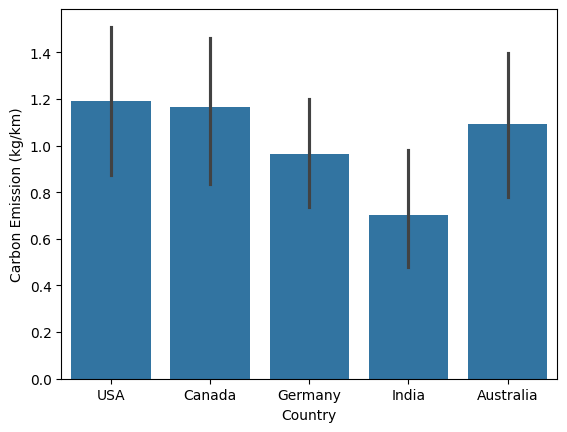

In [62]:
sns.barplot(x="Country", y="Carbon Emission (kg/km)",data=df)
plt.show()

In [63]:
df1['Transport Mode Used'] = df1['Transport Used'].str.split(',')
df1.head()

,Employee Name,Country,Year,Transport Used,Transport Mode Used
0,n360,India,2019,"Bus:18km, Tram:4km","[Bus:18km, Tram:4km]"
1,n250,Australia,2018,"Scooter:25km, Train:9km","[Scooter:25km, Train:9km]"
2,n499,India,2016,"Motorbike:10km, Walking:27km, Train:17km","[Motorbike:10km, Walking:27km, Train:17km]"
3,n979,India,2018,"Train:20km, Ferry:28km, Walking:26km","[Train:20km, Ferry:28km, Walking:26km]"
4,n65,Germany,2018,DieselCar:6km,[DieselCar:6km]


In [64]:
df.head()

,Country,Transport Mode,Carbon Emission (kg/km)
0,USA,Metro,1.82
1,USA,DieselCar,1.97
2,USA,PetrolCar,0.34
3,USA,ElectricCar,1.00
4,USA,Bicycle,0.01


In [65]:
df1 = df1.explode('Transport Mode Used')
df1.head()

,Employee Name,Country,Year,Transport Used,Transport Mode Used
0,n360,India,2019,"Bus:18km, Tram:4km",Bus:18km
0,n360,India,2019,"Bus:18km, Tram:4km",Tram:4km
1,n250,Australia,2018,"Scooter:25km, Train:9km",Scooter:25km
1,n250,Australia,2018,"Scooter:25km, Train:9km",Train:9km
2,n499,India,2016,"Motorbike:10km, Walking:27km, Train:17km",Motorbike:10km


In [66]:
df1[['Transport Mode', 'Distance']] = df1['Transport Mode Used'].str.split(':', expand=True)
df1['Distance'] = df1['Distance'].str.replace('km', '').astype(float)
df = pd.merge(df, df1, on=['Country', 'Transport Mode'])
df.head(100)

,Country,Transport Mode,Carbon Emission (kg/km),Employee Name,Year,Transport Used,Transport Mode Used,Distance
0,USA,Metro,1.82,n894,2013,Metro:12km,Metro:12km,12.0
1,USA,Metro,1.82,n346,2014,"Metro:9km, DieselCar:22km",Metro:9km,9.0
2,USA,Metro,1.82,n249,2021,"Metro:11km, ElectricCar:2km, Bicycle:15km, Wal...",Metro:11km,11.0
3,USA,Metro,1.82,n26,2015,"Metro:1km, Walking:18km, PetrolCar:15km",Metro:1km,1.0
4,USA,Metro,1.82,n771,2012,"Metro:4km, HybridCar:2km, ElectricCar:28km, Ri...",Metro:4km,4.0
...,...,...,...,...,...,...,...,...
95,USA,Bus,1.96,n135,2020,"Bus:27km, PetrolCar:28km, Train:28km, Metro:18km",Bus:27km,27.0
96,USA,Train,0.70,n200,2012,Train:8km,Train:8km,8.0
97,USA,Train,0.70,n217,2023,"Train:18km, Walking:19km, HybridCar:1km",Train:18km,18.0
98,USA,Train,0.70,n778,2013,"Train:26km, Motorbike:2km",Train:26km,26.0


In [67]:
df['Total Emissions'] = df['Distance'] * df['Carbon Emission (kg/km)']
df = df.groupby(['Country', 'Transport Mode']).agg({'Total Emissions': 'sum'}).reset_index()
df.to_csv('structured_data.csv', index=False)

In [69]:
a=pd.read_csv("/content/structured_data.csv")
a.head(100)

,Country,Transport Mode,Total Emissions
0,Australia,Bicycle,272.16
1,Australia,Bus,296.51
2,Australia,DieselCar,154.28
3,Australia,ElectricCar,307.80
4,Australia,Ferry,60.42
...,...,...,...
65,USA,RideSharing,84.36
66,USA,Scooter,273.71
67,USA,Train,146.30
68,USA,Tram,320.96


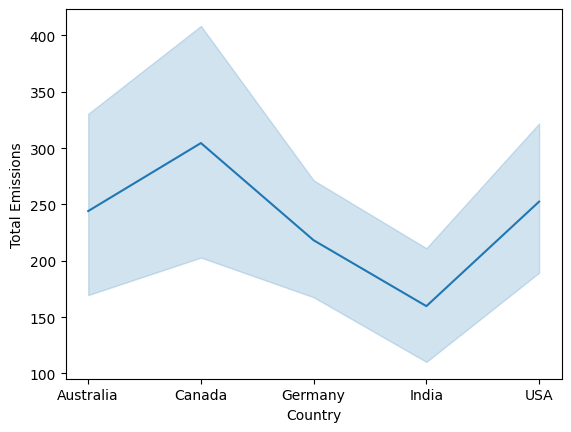

In [71]:
sns.lineplot(x="Country", y="Total Emissions",data=a)
plt.show()

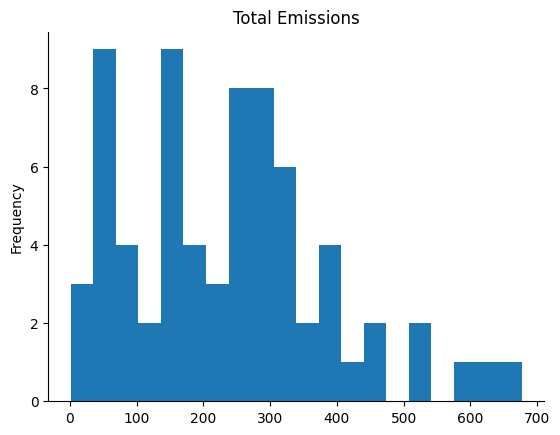

In [74]:
a['Total Emissions'].plot(kind='hist', bins=20, title='Total Emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

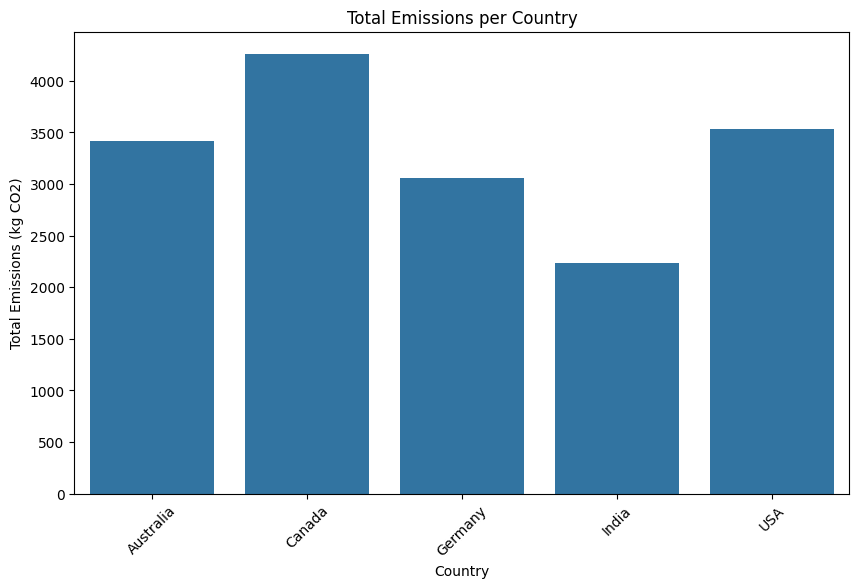

In [80]:
country_emissions = df.groupby('Country')['Total Emissions'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=country_emissions, x='Country', y='Total Emissions')
plt.title('Total Emissions per Country')
plt.xlabel('Country')
plt.ylabel('Total Emissions (kg CO2)')
plt.xticks(rotation=45)
plt.show()


NameError: name 'Year' is not defined